In [1]:
import sys
import uproot
import numpy as np
import matplotlib.pyplot as plt

sys.path.insert(0, '..')
from processing import counts, kinematics 
from plotting import histos

%load_ext autoreload
%autoreload 2

## Load Events

In [2]:
eft_path = "../mg5_data/EFT_ctG_sweep/Events/run_ctG0_decayed_1/tag_1_delphes_events.root"
sm_path = "../mg5_data/SM_spinON/Events/run_01_decayed_1/tag_1_delphes_events.root"

eft_events = uproot.open(eft_path)["Delphes"]
sm_events = uproot.open(sm_path)["Delphes"]

## Jets

../plotting/histos.py:141: UserWarning: The handle <BarContainer object of 8 artists> has a label of '_' which cannot be automatically added to the legend.
  ax[0].legend(legends)


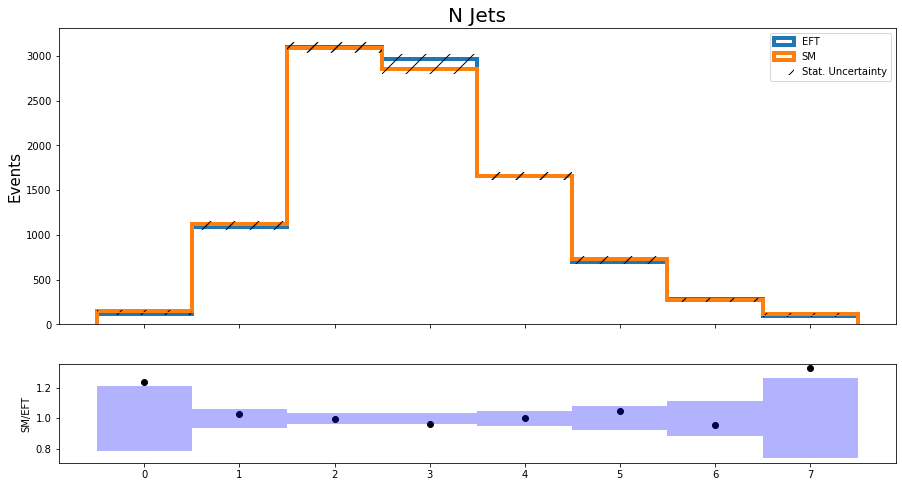

In [3]:
eft_njets = counts.n_particles(eft_events, "Jet.BTag")
sm_njets = counts.n_particles(sm_events, "Jet.BTag")
histos.ratio_hist(
    processes_q=[eft_njets, sm_njets],
    hist_labels=["EFT", "SM"],
    reference_label="EFT",
    n_bins=8,
    hist_range=(0, 8),
    title="N Jets"
)

../plotting/histos.py:141: UserWarning: The handle <BarContainer object of 4 artists> has a label of '_' which cannot be automatically added to the legend.
  ax[0].legend(legends)


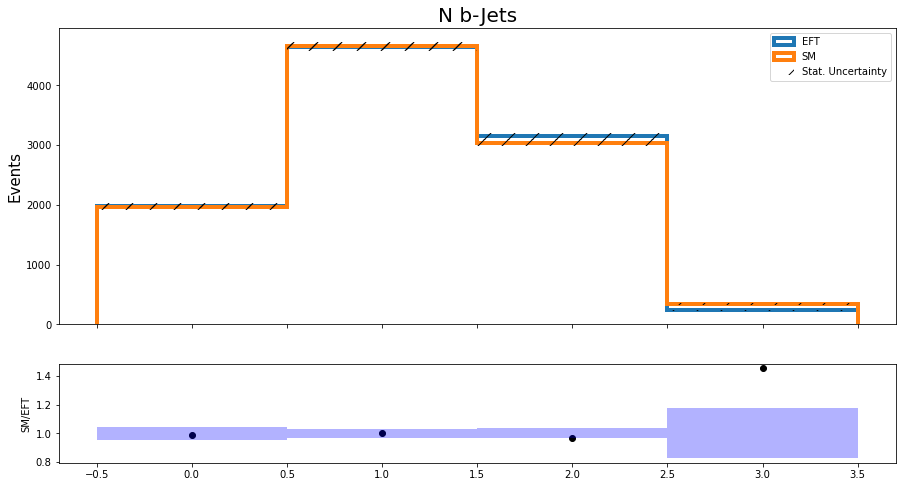

In [4]:
eft_nbjets = counts.n_particles_from_tag(eft_events, "Jet.BTag")
sm_nbjets = counts.n_particles_from_tag(sm_events, "Jet.BTag")
histos.ratio_hist(
    processes_q=[eft_nbjets, sm_nbjets],
    hist_labels=["EFT", "SM"],
    reference_label="EFT",
    n_bins=4,
    hist_range=(0, 4),
    title="N b-Jets"
)

## Leptons

../plotting/histos.py:141: UserWarning: The handle <BarContainer object of 3 artists> has a label of '_' which cannot be automatically added to the legend.
  ax[0].legend(legends)


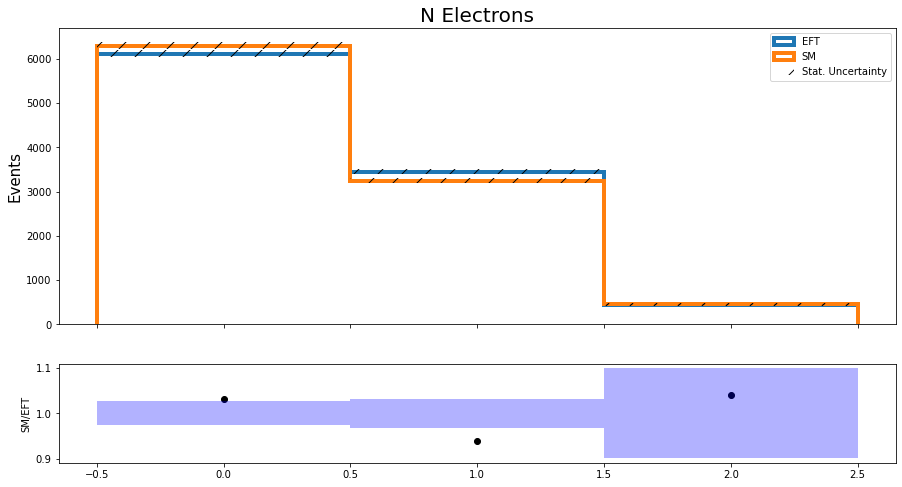

In [5]:
eft_nelec = counts.n_particles(eft_events, "Electron.PT")
sm_nelec = counts.n_particles(sm_events, "Electron.PT")
histos.ratio_hist(
    processes_q=[eft_nelec, sm_nelec],
    hist_labels=["EFT", "SM"],
    reference_label="EFT",
    n_bins=3,
    hist_range=(0, 3),
    title="N Electrons"
)

../plotting/histos.py:141: UserWarning: The handle <BarContainer object of 3 artists> has a label of '_' which cannot be automatically added to the legend.
  ax[0].legend(legends)


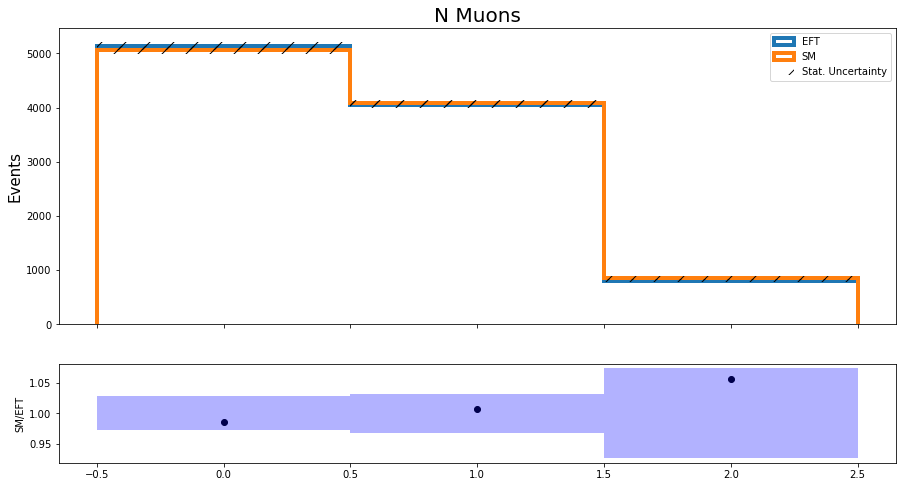

In [6]:
eft_nmuon = counts.n_particles(eft_events, "Muon.PT")
sm_nmuon = counts.n_particles(sm_events, "Muon.PT")
histos.ratio_hist(
    processes_q=[eft_nmuon, sm_nmuon],
    hist_labels=["EFT", "SM"],
    reference_label="EFT",
    n_bins=3,
    hist_range=(0, 3),
    title="N Muons"
)

../plotting/histos.py:141: UserWarning: The handle <BarContainer object of 3 artists> has a label of '_' which cannot be automatically added to the legend.
  ax[0].legend(legends)


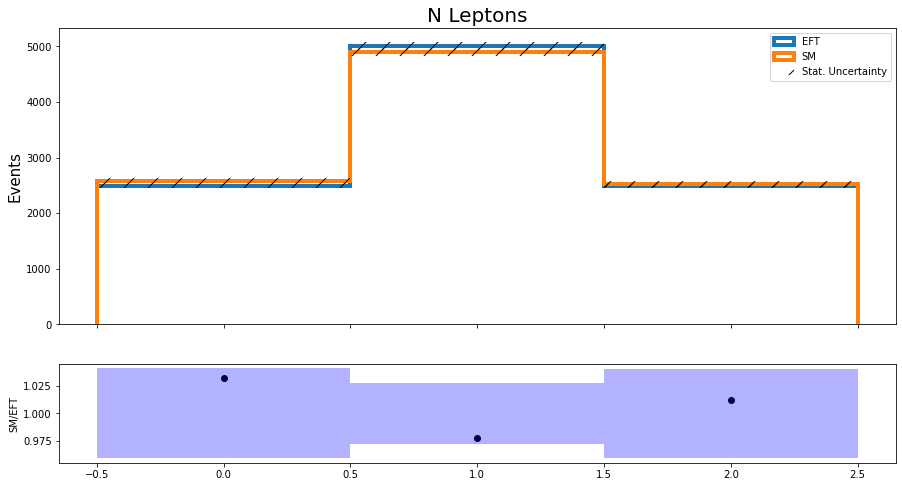

In [7]:
eft_nlep = np.array(eft_nelec) + np.array(eft_nmuon) 
sm_nlep = np.array(sm_nelec) + np.array(sm_nmuon)
histos.ratio_hist(
    processes_q=[eft_nlep, sm_nlep],
    hist_labels=["EFT", "SM"],
    reference_label="EFT",
    n_bins=3,
    hist_range=(0, 3),
    title="N Leptons"
)

## Di-Lepton System

../plotting/histos.py:141: UserWarning: The handle <BarContainer object of 10 artists> has a label of '_' which cannot be automatically added to the legend.
  ax[0].legend(legends)


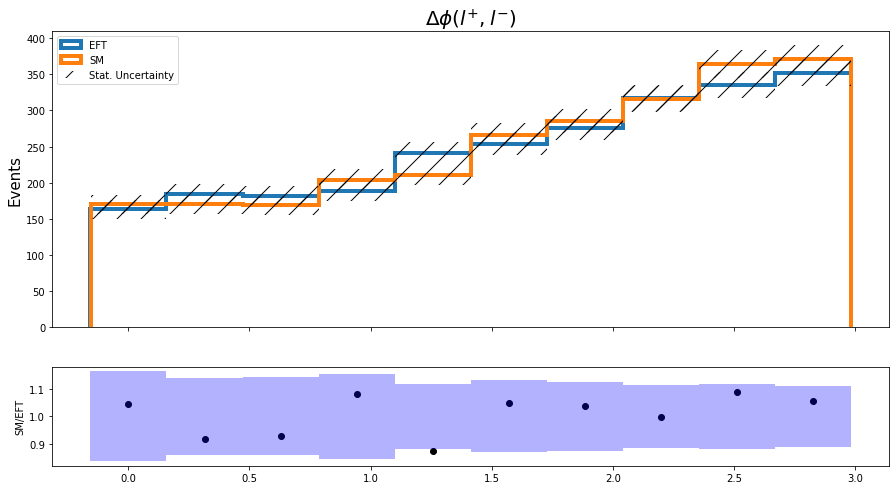

In [8]:
eft_dphi = kinematics.dphi_dilepton(eft_events)
sm_dphi = kinematics.dphi_dilepton(sm_events)
histos.ratio_hist(
    processes_q=[eft_dphi, sm_dphi],
    hist_labels=["EFT", "SM"],
    reference_label="EFT",
    n_bins=10,
    hist_range=None,
    title=r"$\Delta \phi(l^{+}, l^{-})$",
)

## $t\bar{t}$  System

../plotting/histos.py:141: UserWarning: The handle <BarContainer object of 20 artists> has a label of '_' which cannot be automatically added to the legend.
  ax[0].legend(legends)


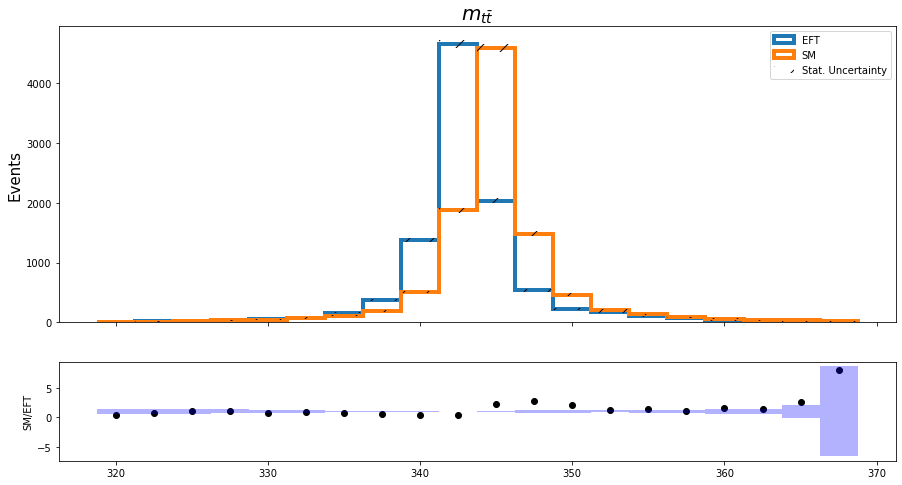

In [9]:
mass_eft_count = kinematics.invariant_mass_ttbar(eft_events)
mass_sm_count = kinematics.invariant_mass_ttbar(sm_events)
histos.ratio_hist(
    processes_q=[mass_eft_count, mass_sm_count],
    hist_labels=["EFT", "SM"],
    reference_label="EFT",
    n_bins=20,
    hist_range=(320, 370),
    title=r"$m_{t\bar{t}}$",
)

../plotting/histos.py:141: UserWarning: The handle <BarContainer object of 20 artists> has a label of '_' which cannot be automatically added to the legend.
  ax[0].legend(legends)


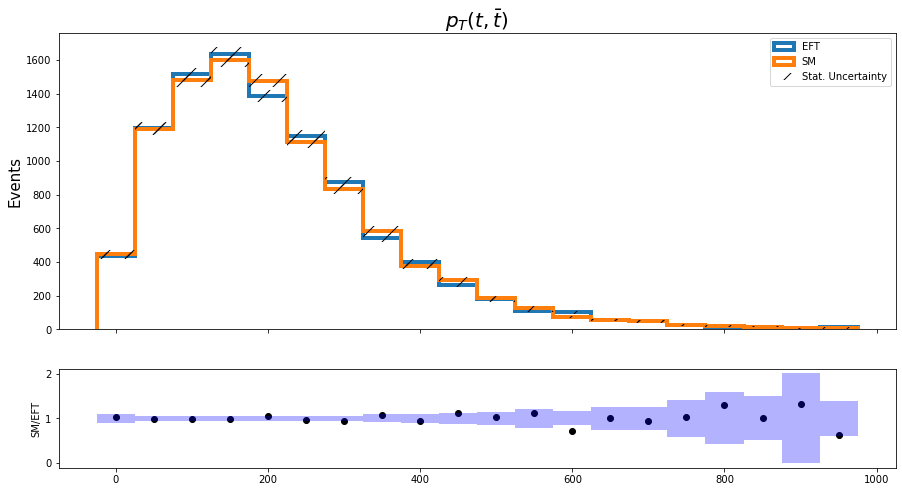

In [10]:
pt_eft_count = kinematics.pt_ttbar(eft_events)
pt_sm_count = kinematics.pt_ttbar(sm_events)
histos.ratio_hist(
    processes_q=[pt_eft_count, pt_sm_count],
    hist_labels=["EFT", "SM"],
    reference_label="EFT",
    n_bins=20,
    hist_range=(0, 1000),
    title=r"$p_T(t, \bar{t})$",
)